Modify NOAA buoy data with a secular (constant) SLR height

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt 

In [2]:
run24=xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_24/elev2D.th.nc")
run25=xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_25/elev2D.th.nc")
run26=xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_26/elev2D.th.nc")
run27=xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_27/elev2D.th.nc")

/global/home/users/jennaisrael/.local/lib/python3.10/site-packages/xarray/backends/plugins.py:75: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
ERROR 1: PROJ: proj_create_from_database: Open of /global/software/sl-7.x86_64/modules/langs/python/3.10/share/proj failed


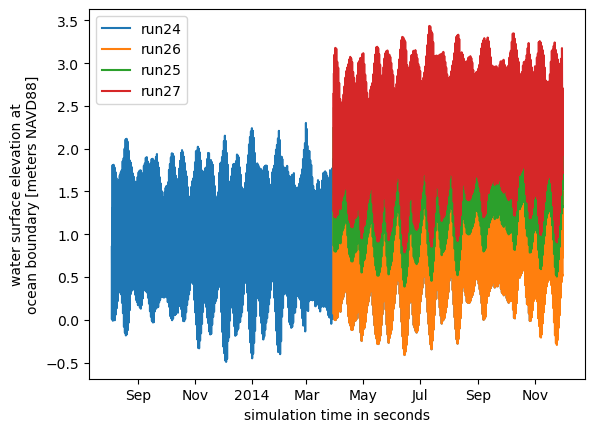

In [7]:
run24.time_series[:,4,:,:].plot(label="run24")

run26.time_series[:,4,:,:].plot(label="run26")
run25.time_series[:,4,:,:].plot(label="run25")
run27.time_series[:,4,:,:].plot(label="run27")
plt.legend()

In [4]:
check=xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_24/ou")
check.tail()

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'gini', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [ ]:
check=xr.open_dataset("/global/scratch/users/jennaisrael/BayDeltaSCHISM/data/ROMS/ROMS_DWR_server/ca_subSFB_fcst_hourly_pst20140320.nc")
print(check)

In [ ]:
np.array(check.salt[1,1,1,:])

In [ ]:
xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_24/outputs_barotropic/hotstart_000269_244800.nc")

In [ ]:
xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_24/outputs_barotropic/uv3D.th.nc",engine='netcdf4')

In [ ]:
xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_16/uv3D.th.nc",engine='netcdf4')

Actually check to make sure the netcdf from run 24 looks different from run 25 (run 25 should have slr)

In [5]:
run24=xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_24/elev2D.th.nc")
run25=xr.open_dataset("/global/scratch/users/jennaisrael/run_schism/run_25/elev2D.th.nc")
#run25.head()

Plot an overlapping period of time to make sure there is a shift in WL

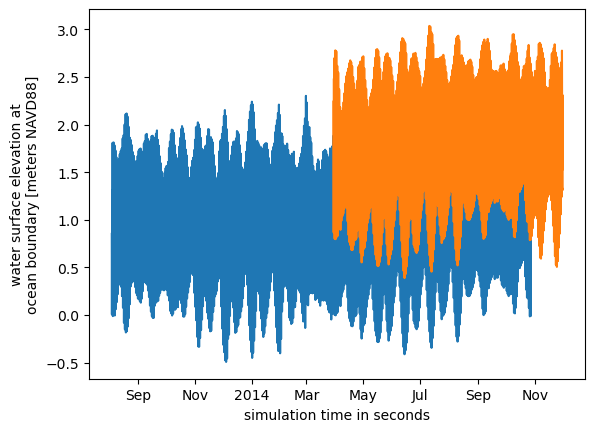

In [6]:
run24.time_series[:,4,:,:].plot()
run25.time_series[:,4,:,:].plot()

In [ ]:
run24.tail()

In [ ]:
run25.time_series.plot()

Data description from 	https://tidesandcurrents.noaa.gov/stations/data/getdata.jsp?p=0&id=9413450

Water Level 6 Minute Raw Data 
		
Station   --  Unique seven character identifier for the station		 
D         --  A one character identifier for the data collection		 
              platform (DCP) at a station									 
SE        --  A two character identifier for the data sensor	
Date Time --  Date and time the data were collected by the DCP
WL        --  Water level height
Sigma     --  Standard deviation of 1 second samples used
              to compute the water level height
O         --  Count of number of samples that fall outside
              a 3-sigma band about the mean
F         --  A flag that when set to 1 indicates that the
              flat tolerance limit was exceeded
R         --  A flag that when set to 1 indicates that the
              rate of change tolerance limit was exceeded
L         --  A flag that when set to 1 indicates that either
              the maximum or minimum expected water level
              height limit was exceeded
Data are in Meters above MLLW
Times are on UTC (GMT)

In [ ]:
#load datasets, need to skip header 8 rows
monterey_org=pd.read_csv("/global/scratch/users/jennaisrael/run_schism/data_out/noaa_9413450_9413450_water_level_2013_2014.csv",skiprows=8)
ptreyes_org=pd.read_csv("/global/scratch/users/jennaisrael/run_schism/data_out/noaa_9415020_9415020_water_level_2013_2014.csv",skiprows=8)

In [ ]:
print(monterey_org)

In [ ]:
monterey_org.columns

In [ ]:
monterey_org[" Water Level"] #There is a space before the first word in this column header

Plot the Time series to get a general sense, too much memory to plot the whole series, instead take a daily average

In [ ]:
sequence_interval = 6/(24*60)#frequency in inverse days 
downsampled_interval = 1
step_size = np.round(downsampled_interval / sequence_interval).astype("int")

downsampled_monterey = monterey_org.iloc[::step_size, :]
downsampled_ptreyes = ptreyes_org.iloc[::step_size, :]
print(downsampled_monterey)



In [ ]:
plt.rcParams["figure.figsize"] = (16,7)
# plt.rcParams.update({
#     'text.usetex' : True
# })

# params = {'axes.labelsize': 20,'axes.titlesize':20, 'legend.fontsize': 13, 'xtick.labelsize': 28, 'ytick.labelsize': 28} #'text.fontsize': 20,
# matplotlib.rcParams.update(params)


font = {'size': 22}
fig, (ax1) = plt.subplots(1)

ax1.plot(downsampled_monterey["Date Time"],downsampled_monterey[" Water Level"],label="Monterey Bay Gauge")
ax1.plot(downsampled_ptreyes["Date Time"],downsampled_ptreyes[" Water Level"],label="Pt Reyes Gauge")
ax1.set_ylabel("Water Level (m)")

plt.legend()
plt.show()

In [ ]:
#Add delh to the "Water Level" column for secular slr
delh=0.8 # sea level rise you want to add in meters
